In [6]:
import sys
print(sys.path)

['/home/jovyan/projects/torch_bayesian', '/home/jovyan/projects/torch_bayesian/examples', '/opt/conda/lib/python38.zip', '/opt/conda/lib/python3.8', '/opt/conda/lib/python3.8/lib-dynload', '', '/home/jovyan/envs/env/lib/python3.8/site-packages']


In [5]:
from illia.distributions.utils import hello

ModuleNotFoundError: No module named 'illia.distributions'

In [1]:
import torch_bayesian.distributions

ModuleNotFoundError: No module named 'torch_bayesian.distributions'

In [4]:
torch_bayesian

<module 'torch_bayesian' from '/home/jovyan/projects/torch_bayesian/torch_bayesian/__init__.py'>

In [2]:
import torch_bayesian

In [4]:
torch_bayesian.generic.distributions.dynamic.GaussianDistribution

AttributeError: module 'torch_bayesian.generic' has no attribute 'distributions'

In [1]:
# machine learning libraries
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch_bayesian.nn import Linear, KLDivergenceLoss
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import Dataset, DataLoader

# other libraries
from tqdm.auto import tqdm
from typing import Dict, Any, Tuple

# set device
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")


/home/jovyan/envs/env/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# own modules
from torch_bayesian.distributions.dynamic.tf.gaussian import GaussianDistribution

import tensorflow as tf

2023-09-04 11:38:26.808097: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-04 11:38:26.851102: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-04 11:38:27.552365: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-09-04 11:38:28.371407: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at htt

In [3]:
distri = GaussianDistribution((30, 30))

In [4]:
distri.sample(None)

<tf.Tensor: shape=(), dtype=float32, numpy=4560.2017>

In [5]:
mu = tf.Variable(np.random.rand(10, 30), dtype=tf.float32)

In [5]:
with tf.GradientTape() as tape:
    y = distri.log_prob(None)
    
grad = tape.gradient(y, distri.trainable_variables)
grad

: 

: 

In [49]:
l1 = tf.keras.layers.Dense(30, kernel_initializer=tf.constant_initializer(1.))
l1.build(input_shape=(64, 10))
l1.weights[0].assign(mu)
l1.weights

[<tf.Variable 'kernel:0' shape=(10, 30) dtype=float32, numpy=
 array([[0.36473933, 0.19978449, 0.24014707, 0.07723697, 0.74673045,
         0.8321089 , 0.8285681 , 0.5375087 , 0.3988292 , 0.5687957 ,
         0.70157295, 0.806364  , 0.19578612, 0.04028549, 0.24579974,
         0.6145793 , 0.3004937 , 0.40260363, 0.2180527 , 0.00388393,
         0.5820246 , 0.22481292, 0.9949636 , 0.91019994, 0.39927822,
         0.05564792, 0.35130343, 0.25620154, 0.16826215, 0.48729792],
        [0.01532633, 0.56265265, 0.70147717, 0.46216682, 0.39135787,
         0.40371448, 0.7273732 , 0.45450795, 0.1523453 , 0.9622418 ,
         0.7929379 , 0.8056138 , 0.47831446, 0.91885066, 0.19193794,
         0.07280849, 0.7574673 , 0.5647693 , 0.4877451 , 0.1671671 ,
         0.05150088, 0.24271086, 0.6159779 , 0.11338274, 0.18179615,
         0.07209656, 0.7379414 , 0.4821642 , 0.79549485, 0.14380136],
        [0.20542173, 0.10134786, 0.23644532, 0.63363767, 0.35896426,
         0.73049676, 0.33280835, 0.0204

In [51]:
l1.trainable = False
l1.trainable

False

In [40]:
l1(np.random.rand(30, 10))

<tf.Tensor: shape=(30, 30), dtype=float32, numpy=
array([[6.390341 , 6.390341 , 6.390341 , 6.390341 , 6.390341 , 6.390341 ,
        6.390341 , 6.390341 , 6.390341 , 6.390341 , 6.390341 , 6.390341 ,
        6.390341 , 6.390341 , 6.390341 , 6.390341 , 6.390341 , 6.390341 ,
        6.390341 , 6.390341 , 6.390341 , 6.390341 , 6.390341 , 6.390341 ,
        6.390341 , 6.390341 , 6.390341 , 6.390341 , 6.390341 , 6.390341 ],
       [6.6576095, 6.6576095, 6.6576095, 6.6576095, 6.6576095, 6.6576095,
        6.6576095, 6.6576095, 6.6576095, 6.6576095, 6.6576095, 6.6576095,
        6.6576095, 6.6576095, 6.6576095, 6.6576095, 6.6576095, 6.6576095,
        6.6576095, 6.6576095, 6.6576095, 6.6576095, 6.6576095, 6.6576095,
        6.6576095, 6.6576095, 6.6576095, 6.6576095, 6.6576095, 6.6576095],
       [4.2268114, 4.2268114, 4.2268114, 4.2268114, 4.2268114, 4.2268114,
        4.2268114, 4.2268114, 4.2268114, 4.2268114, 4.2268114, 4.2268114,
        4.2268114, 4.2268114, 4.2268114, 4.2268114, 4.226811

In [41]:
l1.weights

[<tf.Variable 'dense_11/kernel:0' shape=(10, 30) dtype=float32, numpy=
 array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1

In [36]:
mu = tf.cast(mu, dtype=tf.float32)
mu

<tf.Tensor: shape=(30, 30), dtype=float32, numpy=
array([[0.90896076, 0.6788717 , 0.22191955, 0.90292317, 0.40478536,
        0.01319044, 0.12805282, 0.47227287, 0.62938637, 0.39862892,
        0.32019573, 0.89874077, 0.70337373, 0.99292827, 0.9046239 ,
        0.7231984 , 0.01590674, 0.65705216, 0.954092  , 0.18078138,
        0.09648917, 0.74860907, 0.59640455, 0.43221915, 0.59638405,
        0.22017008, 0.63693404, 0.9854754 , 0.05950945, 0.01215093],
       [0.7289796 , 0.05345548, 0.91372776, 0.22132596, 0.9251646 ,
        0.29784408, 0.24937753, 0.5007788 , 0.35849908, 0.99444866,
        0.6033476 , 0.55690503, 0.28201997, 0.0476655 , 0.05502854,
        0.5391637 , 0.62603253, 0.69798356, 0.4995616 , 0.9745744 ,
        0.9700031 , 0.6308959 , 0.8428214 , 0.53608084, 0.81052685,
        0.52573854, 0.9212631 , 0.2144646 , 0.81926244, 0.10518602],
       [0.1735728 , 0.514266  , 0.8472995 , 0.04504975, 0.6038649 ,
        0.31597087, 0.8505666 , 0.90261644, 0.26498726, 0.503132

In [37]:
l1.weights[0].assign(mu)

<tf.Variable 'UnreadVariable' shape=(30, 30) dtype=float32, numpy=
array([[0.90896076, 0.6788717 , 0.22191955, 0.90292317, 0.40478536,
        0.01319044, 0.12805282, 0.47227287, 0.62938637, 0.39862892,
        0.32019573, 0.89874077, 0.70337373, 0.99292827, 0.9046239 ,
        0.7231984 , 0.01590674, 0.65705216, 0.954092  , 0.18078138,
        0.09648917, 0.74860907, 0.59640455, 0.43221915, 0.59638405,
        0.22017008, 0.63693404, 0.9854754 , 0.05950945, 0.01215093],
       [0.7289796 , 0.05345548, 0.91372776, 0.22132596, 0.9251646 ,
        0.29784408, 0.24937753, 0.5007788 , 0.35849908, 0.99444866,
        0.6033476 , 0.55690503, 0.28201997, 0.0476655 , 0.05502854,
        0.5391637 , 0.62603253, 0.69798356, 0.4995616 , 0.9745744 ,
        0.9700031 , 0.6308959 , 0.8428214 , 0.53608084, 0.81052685,
        0.52573854, 0.9212631 , 0.2144646 , 0.81926244, 0.10518602],
       [0.1735728 , 0.514266  , 0.8472995 , 0.04504975, 0.6038649 ,
        0.31597087, 0.8505666 , 0.90261644, 0.2

In [2]:
data: Dict[str, Any] = fetch_california_housing()
X: np.ndarray = data["data"]
y: np.ndarray = data["target"]

In [3]:
class SklearnDataset(Dataset):
    X: np.ndarray
    y: np.ndarray
    
    def __init__(self, X, y):
        
        self.X = X
        self.y = y
        
    def __len__(self) -> int:
        return self.X.shape[0]
    
    def __getitem__(self, index: int):
        element = torch.from_numpy(self.X[index, :])
        label = self.y[index]
        
        return element, label
    
def load_data(X: np.ndarray, y: np.ndarray) -> Tuple[DataLoader, DataLoader]:
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    train_dataset = SklearnDataset(X_train, y_train)
    test_dataset = SklearnDataset(X_test, y_test)
    
    train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=64)
    test_dataloader = DataLoader(test_dataset, shuffle=True, batch_size=64)
    
    return train_dataloader, test_dataloader

train_data, test_data = load_data(X, y)

In [4]:
class MLP(torch.nn.Module):
    
    def __init__(self, input_size: int, output_size: int) -> None:
        # call super class constructor
        super().__init__()
        
        # define mlp
        self.mlp = torch.nn.Sequential(
            torch.nn.Linear(input_size, 256),
            torch.nn.ReLU(),
            torch.nn.Linear(256, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, output_size)
        )
        
    def forward(self, inputs: torch.Tensor) -> torch.Tensor:
        return self.mlp(inputs)
    
    
class MLPBayesian(torch.nn.Module):
    
    def __init__(self, input_size: int, output_size: int) -> None:
        # call super class constructor
        super().__init__()
        
        # define mlp
        self.mlp = torch.nn.Sequential(
            Linear(input_size, 256),
            torch.nn.ReLU(),
            Linear(256, 64),
            torch.nn.ReLU(),
            Linear(64, output_size)
        )
        
    def forward(self, inputs: torch.Tensor) -> torch.Tensor:
        return self.mlp(inputs)

In [18]:
# define loss, model and optimizer
loss = torch.nn.MSELoss()
model = MLP(X.shape[1], 1).to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-2)

# init metrics vectors
train_losses = []
test_losses = []

for epoch in tqdm(range(20)):
    # activate train mode
    model.train()
    
    # init losses
    losses =[]
    
    # iterate over train
    for elements, targets in train_data:
        # passs elements to correct device
        elements = elements.float().to(device)
        targets = targets.float().to(device)
        
        # compute outputs and loss value
        outputs = model(elements)[:, 0]
        loss_value = loss(outputs, targets)
        
        # optimize
        optimizer.zero_grad()
        loss_value.backward()
        optimizer.step()
        
        # add loss to vector
        losses.append(loss_value.item())
        
    train_losses.append(np.mean(losses))
    
    # activate eval mode
    model.eval()
    
    # init losses
    losses =[]
    
    # iterate over test
    with torch.no_grad():
        for elements, targets in train_data:
            # passs elements to correct device
            elements = elements.float().to(device)
            targets = targets.float().to(device)
            
            # compute outputs and loss value
            outputs = model(elements)[:, 0]
            loss_value = loss(outputs, targets)
            
            # add loss to vector
            losses.append(loss_value.item())
            
    test_losses.append(np.mean(losses))
        

100%|██████████| 20/20 [00:14<00:00,  1.40it/s]


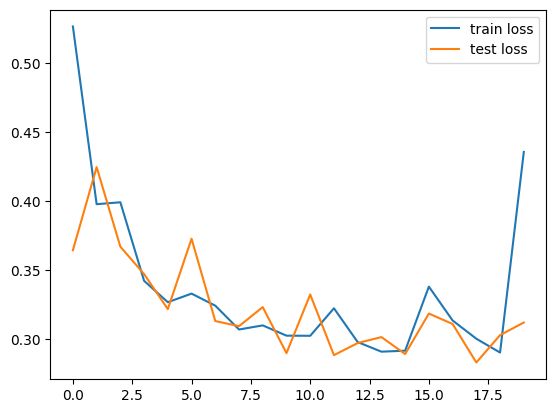

In [19]:
plt.plot(train_losses)
plt.plot(test_losses)
plt.legend(["train loss", "test loss"])
plt.show()

In [10]:
# define loss, model and optimizer
loss = torch.nn.MSELoss()
kl_loss = KLDivergenceLoss(weight=0) 
model = MLPBayesian(X.shape[1], 1).to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)

# init metrics vectors
train_losses = []
kl_losses_global = []
test_losses = []

for epoch in tqdm(range(100)):
    # activate train mode
    model.train()
    
    # init losses
    losses =[]
    kl_losses = []
    
    # iterate over train
    for elements, targets in train_data:
        # passs elements to correct device
        elements = elements.float().to(device)
        targets = targets.float().to(device)
        
        # compute outputs and loss value
        outputs = model(elements)[:, 0]
        loss_value = loss(outputs, targets) + kl_loss(model)
        
        # optimize
        optimizer.zero_grad()
        loss_value.backward()
        optimizer.step()
        
        # add loss to vector
        with torch.no_grad():
            kl_losses.append(kl_loss(model).item())
            losses.append(loss(outputs, targets).item())
        
    train_losses.append(np.mean(losses))
    kl_losses_global.append(np.mean(kl_losses))
    
    # activate eval mode
    model.eval()
    
    # init losses
    losses =[]
    
    # iterate over test
    with torch.no_grad():
        for elements, targets in train_data:
            # passs elements to correct device
            elements = elements.float().to(device)
            targets = targets.float().to(device)
            
            # compute outputs and loss value
            outputs = model(elements)[:, 0]
            loss_value = loss(outputs, targets)
            
            # add loss to vector
            losses.append(loss_value.item())
            
    test_losses.append(np.mean(losses))

100%|██████████| 100/100 [10:35<00:00,  6.36s/it]


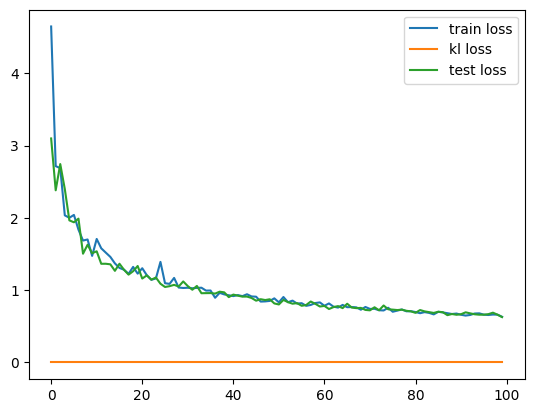

In [11]:
plt.plot(train_losses)
plt.plot(kl_losses_global)
plt.plot(test_losses)
plt.legend(["train loss", "kl loss", "test loss"])
plt.show()

In [12]:
icc_accs = []
samples = 50
std_multiplier = 2

loss_function = torch.nn.MSELoss()

# iterate over test
with torch.no_grad():
    for elements, targets in train_data:
        # passs elements to correct device
        elements = elements.float().to(device)
        targets = targets.float().to(device)
        
        # compute outputs and loss value
        outputs = model(elements)[:, 0]
        loss_value = loss_function(outputs, targets)
        
        # add loss to vector
        preds = [model(elements) for i in range(samples)]
        preds = torch.stack(preds)
        means = preds.mean(axis=0)
        stds = preds.std(axis=0)
        ci_upper = means + (std_multiplier * stds)
        ci_lower = means - (std_multiplier * stds)
        ic_acc = (ci_lower <= targets) * (ci_upper >= targets)
        ic_acc = ic_acc.float().mean()
        
        icc_accs.append(ic_acc.item())
        
print(np.mean(icc_accs))

0.4498385643774225


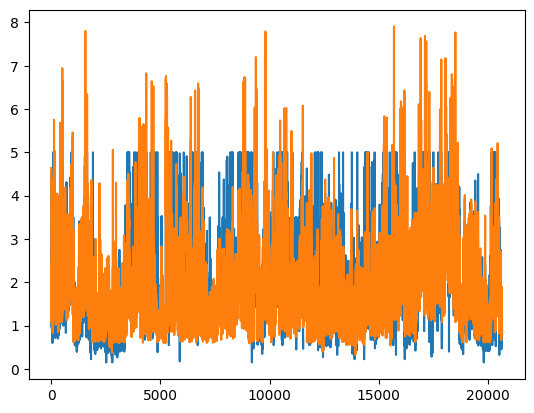

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 
plt.plot(y)
plt.plot(model(torch.from_numpy(X_scaled).float().to(device)).detach().cpu().numpy())